In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# (50000, ): 1D -> List
# (50000, 1): 2D -> 表格 -> 1行 50000列
print(y_train.shape)
y_train

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
trans = ["airplane", "automobile", "bird",
         "cat", "deer", "dog", "frog",
         "horse", "ship", "truck"]

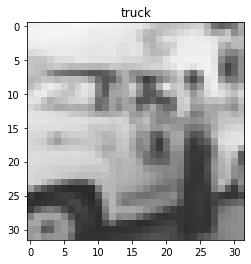

In [6]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
idx = random.randint(0, 49999)
plt.title(trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout

cnn = Sequential()
# CNN Layer
# 3 * 3 * 3(1 filter) * 64 + 64(bias) = 1792
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 3 * 3 * 64(1 filter) * 128 + 128(bias) = 73856
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
# MLP Layer
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         


In [0]:
# 處理圖片: / 255
x_train_norm = x_train / 255
x_test_norm = x_test / 255
# print(x_train_norm[0])

In [9]:
# 處理答案: one-hot
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print(y_train[0])
print(y_train_cat[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [10]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam", 
            metrics=["accuracy"])

In [12]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/5
 - 9s - loss: 0.6558 - acc: 0.7702 - val_loss: 0.7521 - val_acc: 0.7422
Epoch 2/5
 - 9s - loss: 0.5744 - acc: 0.7994 - val_loss: 0.7179 - val_acc: 0.7600
Epoch 3/5
 - 9s - loss: 0.5063 - acc: 0.8238 - val_loss: 0.6866 - val_acc: 0.7700
Epoch 4/5
 - 9s - loss: 0.4432 - acc: 0.8429 - val_loss: 0.6937 - val_acc: 0.7728
Epoch 5/5
 - 9s - loss: 0.3824 - acc: 0.8636 - val_loss: 0.6962 - val_acc: 0.7768


In [13]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 187us/step


[0.754897789478302, 0.759]

In [17]:
# 衡量模型2
import pandas as pd
from sklearn.metrics import confusion_matrix
pre = cnn.predict_classes(x_test_norm)
i = ["{} (正確)".format(i) for i in trans]
c = ["{} (預測)".format(i) for i in trans]
pd.DataFrame(confusion_matrix(y_test, pre),
             index=i,
             columns=c)

,airplane (預測),automobile (預測),bird (預測),cat (預測),deer (預測),dog (預測),frog (預測),horse (預測),ship (預測),truck (預測)
airplane (正確),837,10,32,16,17,4,4,7,43,30
automobile (正確),16,877,4,9,3,2,7,1,28,53
bird (正確),62,5,609,76,106,67,33,26,10,6
cat (正確),25,11,49,654,61,116,32,29,12,11
deer (正確),20,3,39,77,747,40,15,50,8,1
dog (正確),13,8,30,209,39,651,8,34,6,2
frog (正確),8,6,35,97,39,29,761,6,12,7
horse (正確),15,2,18,52,65,63,3,771,2,9
ship (正確),46,21,13,13,12,3,2,1,875,14
truck (正確),34,74,5,21,7,9,4,11,27,808


In [26]:
y_test_1d = y_test.reshape(-1)
y_test_1d

array([3, 8, 8, ..., 5, 1, 7])

預測錯誤: 200


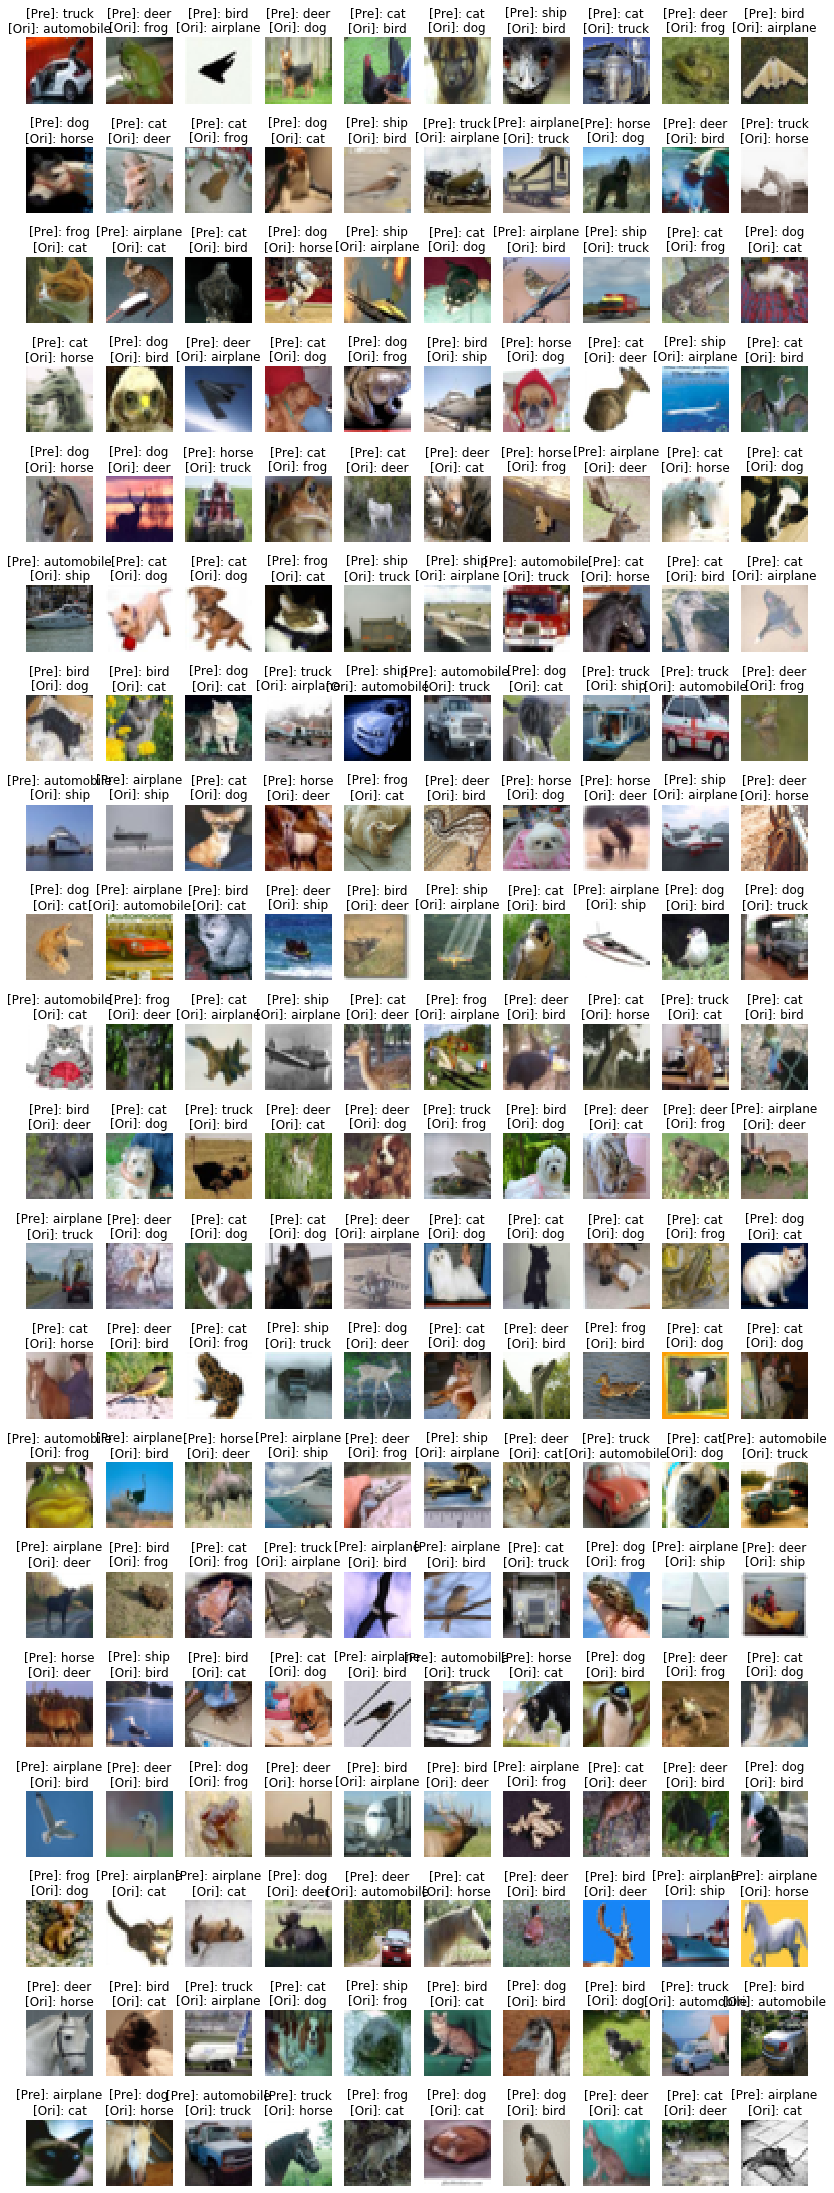

In [27]:
import numpy as np

# nonzero: (1st索引, 2nd索引, 3rd索引...)
idx = np.nonzero(pre != y_test_1d)[0][:200]
print("預測錯誤:", len(idx))
pre_false_img = x_test[idx]
pre_false_label = y_test_1d[idx]
pre_false_predict = pre[idx]

width = 10
height = len(idx) // width + 1

plt.figure(figsize=(14, 42))
for i, img in enumerate(pre_false_img):
    plt.subplot(height, width, i+1)
    t = "[Pre]: {}\n[Ori]: {}".format(trans[pre_false_predict[i]],
                                      trans[pre_false_label[i]])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)